# Simple example
This notebook provides a brief overview of PyJobShop's modeling features for solving scheduling problems, specifically:

- How to model a simple scheduling problem using PyJobShop's `Model` interface,
- How to inspect the resulting solution, and
- How to plot the found solution.

## Scheduling key concepts
Before we get started, let's first review the main three elements of a scheduling problem:

- **Jobs**: a job represents a collection of operations that needs to be completed.
- **Operations**: an operation is a single task of a job that needs to be be processed on an eligible machine.
- **Machines**: a machine is a resource that can process operations.

In scheduling, the goal is to schedule all operations such that some objective function is minimized, which is often based on the job completion times. Scheduling an operation means deciding which machine it is assigned to and its start and completion times. We may also have to take into account constraints, such as specific a specific processing ordering of operations, or machine setup times, but we will save those extensions for later examples.

Let's now get started with a very simple example.

## Model
To define a scheduling problem, we use PyJobShop's `Model` interface. This interface allows us to define scheduling problems conveniently without having to know what happens under the hood. We first import the class and then initialize an instance of the model.

In [1]:
from pyjobshop import Model

model = Model()

Let's add some data to the model. We add four jobs, each consisting of two operations.

In [2]:
jobs = [model.add_job() for _ in range(4)]
operations = [[model.add_operation(job=job) for _ in range(2)] for job in jobs]

Passing the `job` argument to `m.add_operation(job=job)` ensures that the created operation belongs to the right job.
Next, we have to create the machines and also specify processing times for each operation. The duration of an operation is equal to the job index plus one (1, 2, 3 or 4).

In [3]:
machines = [model.add_machine() for _ in range(2)]

for job in range(len(jobs)):
    for operation in operations[job]:
        for machine in machines:
            duration = job + 1
            model.add_processing_time(machine, operation, duration)

Now that we have defined all important elements, we can now solve this model. By default, the model aims to minimize the makespan, which is the maximum completion time of all jobs.

In [4]:
result = model.solve()

We found the optimal solution!

## Solution

The result variables stores a `Result` object that contains information about the solving progress and the best-found solution. A solution consists of `Task`s, which stores for each operation the assigned machine, the start time, and the duration.

In [5]:
for task in result.best.schedule:
    print(task)

Task(operation=0, machine=1, start=6, duration=1)
Task(operation=1, machine=1, start=7, duration=1)
Task(operation=2, machine=0, start=8, duration=2)
Task(operation=3, machine=1, start=8, duration=2)
Task(operation=4, machine=1, start=0, duration=3)
Task(operation=5, machine=1, start=3, duration=3)
Task(operation=6, machine=0, start=0, duration=4)
Task(operation=7, machine=0, start=4, duration=4)


## Plotting

Each scheduled operation can now be nicely plotted in a Gantt chart.

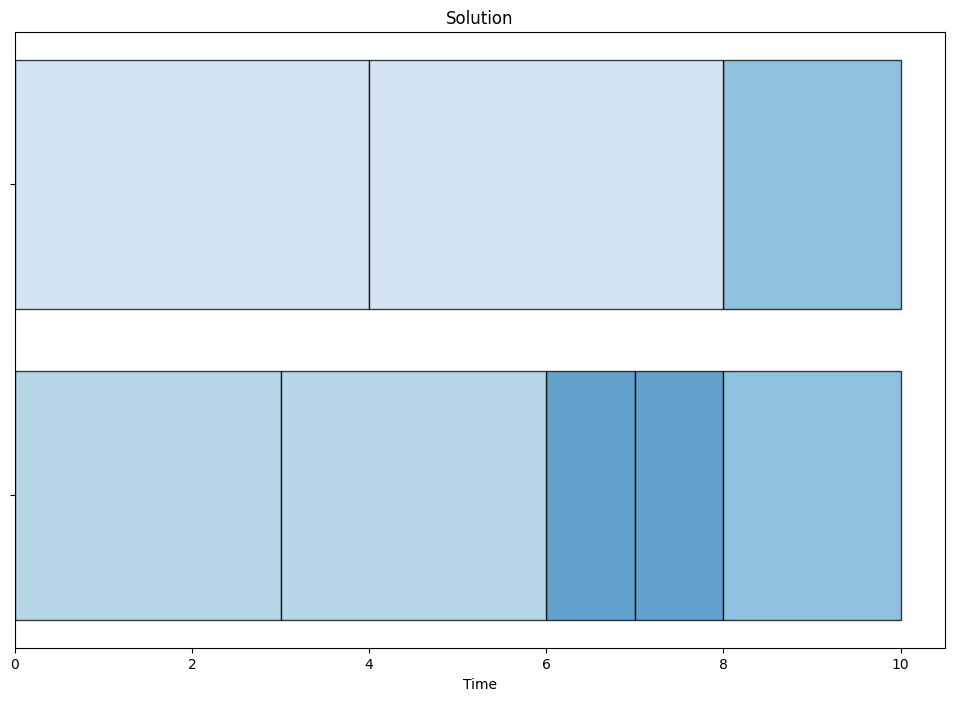

In [6]:
from pyjobshop import plot

data = model.data()
plot(data, result.best)

The plot shows a Gantt chart of our solution. Each row represents a machine and each horizontal bar represents a scheduled operation.
The colors of the operations depict the individual jobs they are associated with, with each job having a unique color.

## Conclusion

This concludes this example. We showed how to use PyJobShop's Model interface to setup a simple example, and we showed the representation of a solution and how it can be plotted. For more details about `Model`, see the [API documentation](https://pyjobshop.readthedocs.io/en/latest/api/pyjobshop.html#pyjobshop.Model.Model). In the next notebooks, we show you how to model classical scheduling models.